In [1]:
%store -r import_all_libs

In [2]:
import_all_libs

In [3]:
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing

In [4]:
def print_metrics(y_true, y_pred):
    '''
    Prints regression metrics
    '''
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print("---> MAE: {}".format(mae))
    print("---> MSE: {}".format(mse))
    print("---> RMSE: {}".format(np.sqrt(mse)))

In [5]:
data = fetch_california_housing()
X, y = data.data, data.target
X = pd.DataFrame(X, columns=data.feature_names)
y = pd.DataFrame(y, columns=data.target_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25


In [6]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

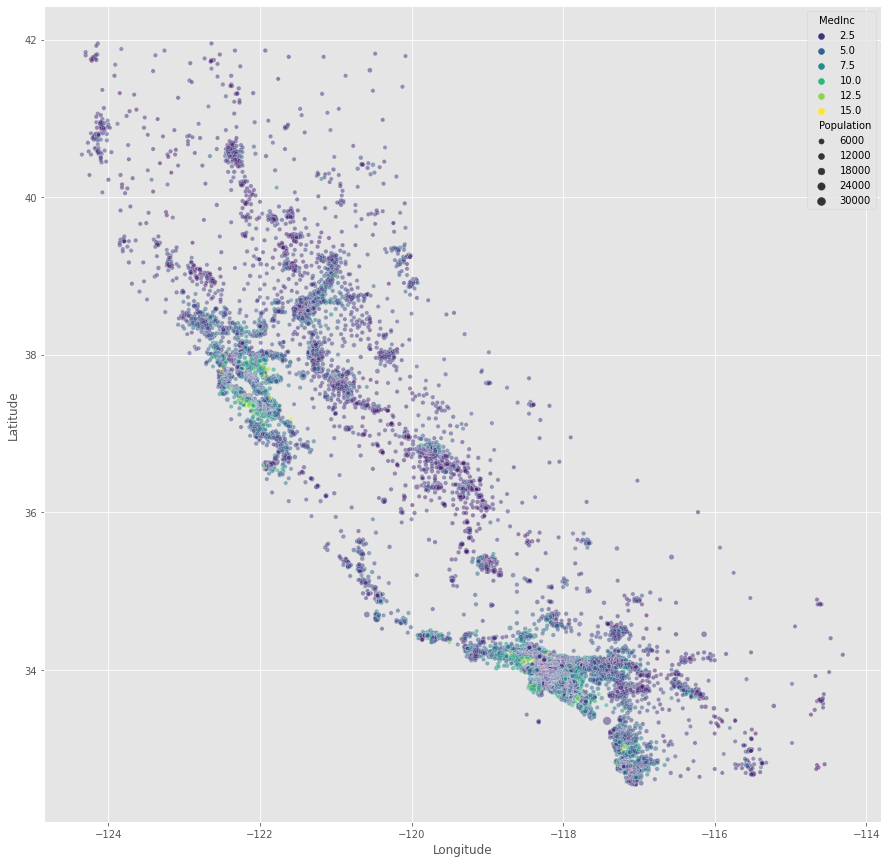

In [7]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=X.Longitude, y=X.Latitude, size=X.Population, hue=X.MedInc, palette='viridis', alpha=.5);

In [8]:
X.drop(['Latitude', 'Longitude'], inplace=True, axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [10]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
8158,4.21,37.00,5.29,0.97,860.00,2.53
18368,5.35,42.00,6.36,1.09,957.00,2.40
19197,3.92,36.00,6.11,1.06,711.00,2.24
3746,6.37,32.00,6.00,0.99,1159.00,2.27
13073,2.37,17.00,4.80,1.04,706.00,2.09


In [11]:
y_train.head()

,MedHouseVal
8158,2.29
18368,2.80
19197,1.83
3746,4.66
13073,1.50


In [12]:
simple_gb = GradientBoostingRegressor()
simple_cb = CatBoostRegressor()

simple_gb.fit(X_train, y_train.values.ravel())
gb_pred = simple_gb.predict(X_test)

simple_cb.fit(X_train, y_train, verbose=100)
cb_pred = simple_cb.predict(X_test)

Learning rate set to 0.063559
0:	learn: 1.1146145	total: 78.1ms	remaining: 1m 18s
100:	learn: 0.6239735	total: 763ms	remaining: 6.79s
200:	learn: 0.5983204	total: 1.4s	remaining: 5.58s
300:	learn: 0.5809674	total: 2.07s	remaining: 4.8s
400:	learn: 0.5669888	total: 2.93s	remaining: 4.38s
500:	learn: 0.5557100	total: 4.03s	remaining: 4.01s
600:	learn: 0.5456731	total: 4.55s	remaining: 3.02s
700:	learn: 0.5367516	total: 4.96s	remaining: 2.12s
800:	learn: 0.5286600	total: 5.41s	remaining: 1.34s
900:	learn: 0.5202664	total: 5.78s	remaining: 635ms
999:	learn: 0.5124886	total: 6.21s	remaining: 0us


In [13]:
print('Simple GB')
print_metrics(y_test, gb_pred)
print('Simple CatBoost')
print_metrics(y_test, cb_pred)

Simple GB
---> MAE: 0.46886924833336147
---> MSE: 0.423535562589687
---> RMSE: 0.6507960990891748
Simple CatBoost
---> MAE: 0.45441205244611693
---> MSE: 0.4041509460739686
---> RMSE: 0.6357286733143068


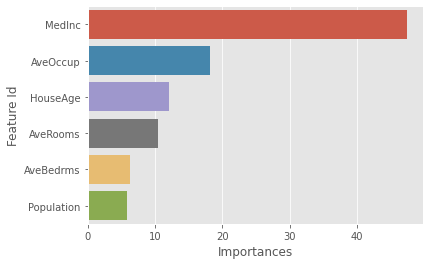

In [22]:
feature_importance = simple_cb.get_feature_importance(prettified=True)
sns.barplot(x="Importances", y="Feature Id", data=feature_importance);

In [23]:
explainer = shap.TreeExplainer(simple_gb)
shap_values_train = explainer.shap_values(X_train)

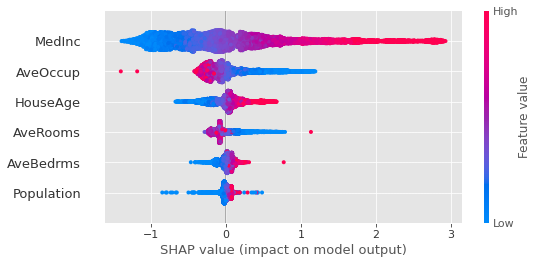

In [24]:
shap.summary_plot(shap_values_train, X_train)